In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
data = pd.read_csv('data/clean_data.csv')
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_2,tenure_3,tenure_4,tenure_5
0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,29.8500,29.8500,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,56.9500,1889.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,53.8500,108.1500,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,42.3000,1840.7500,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,70.7000,151.6500,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   float64
 1   SeniorCitizen                          7021 non-null   float64
 2   Partner                                7021 non-null   float64
 3   Dependents                             7021 non-null   float64
 4   PhoneService                           7021 non-null   float64
 5   OnlineSecurity                         7021 non-null   float64
 6   OnlineBackup                           7021 non-null   float64
 7   DeviceProtection                       7021 non-null   float64
 8   TechSupport                            7021 non-null   float64
 9   StreamingTV                            7021 non-null   float64
 10  StreamingMovies                        7021 non-null   float64
 11  Pape

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Churn', axis=1)
y = data.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 1. Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 80.10%
_______________________________________________
Classification Report:	Precision Score: 66.94%
			Recall Score: 49.62%
			F1 score: 56.99%
_______________________________________________
Confusion Matrix: 
 [[3288  320]
 [ 658  648]]

Test Result:
Accuracy Score: 79.31%
_______________________________________________
Classification Report:	Precision Score: 64.34%
			Recall Score: 46.82%
			F1 score: 54.20%
_______________________________________________
Confusion Matrix: 
 [[1413  143]
 [ 293  258]]



## Cross Validation Score for Logistic Regression

In [7]:
from sklearn.model_selection import cross_val_score

X_std = scaler.transform(X)

scores = cross_val_score(lr_classifier, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57038391 0.57220708 0.57904412]
Logistic Accuracy: 57.39% +/- (0.37)


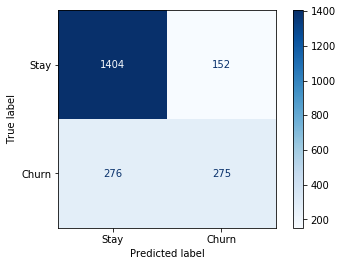

In [8]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

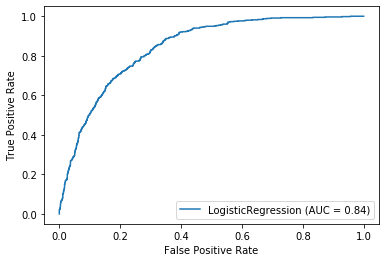

In [9]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)

# 2. Random Forest Classifier

In [10]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
churn = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Churning Rate: {churn * 100 :.2f}%")

Staying Rate: 73.42%
Churning Rate: 26.58%


In [11]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.72%
_______________________________________________
Classification Report:	Precision Score: 99.46%
			Recall Score: 99.46%
			F1 score: 99.46%
_______________________________________________
Confusion Matrix: 
 [[3601    7]
 [   7 1299]]

Test Result:
Accuracy Score: 79.35%
_______________________________________________
Classification Report:	Precision Score: 63.88%
			Recall Score: 48.46%
			F1 score: 55.11%
_______________________________________________
Confusion Matrix: 
 [[1405  151]
 [ 284  267]]



In [12]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {'n_estimators':[550, 600, 650],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
# rf_grid_cv.fit(X_train, y_train)

In [13]:
# rf_grid_cv.best_estimator_

In [14]:
rf_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=3, 
                                min_samples_split=3,
                                n_estimators=600)

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.57%
_______________________________________________
Classification Report:	Precision Score: 77.24%
			Recall Score: 59.49%
			F1 score: 67.21%
_______________________________________________
Confusion Matrix: 
 [[3379  229]
 [ 529  777]]

Test Result:
Accuracy Score: 80.30%
_______________________________________________
Classification Report:	Precision Score: 66.50%
			Recall Score: 49.73%
			F1 score: 56.91%
_______________________________________________
Confusion Matrix: 
 [[1418  138]
 [ 277  274]]



## Cross Validation Score for Random Forest Classifier

In [15]:
scores = cross_val_score(rf_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57731959 0.56884058 0.57276119]
Random Forest F1_score: 57.30% +/- (0.35)


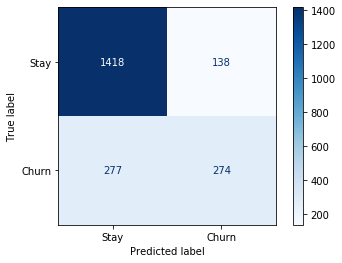

In [16]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

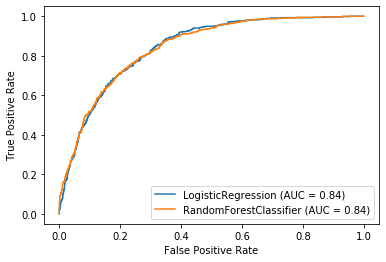

In [17]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

# 3. Support Vector Machine

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 82.36%
_______________________________________________
Classification Report:	Precision Score: 73.68%
			Recall Score: 52.30%
			F1 score: 61.17%
_______________________________________________
Confusion Matrix: 
 [[3364  244]
 [ 623  683]]

Test Result:
Accuracy Score: 79.64%
_______________________________________________
Classification Report:	Precision Score: 66.05%
			Recall Score: 45.55%
			F1 score: 53.92%
_______________________________________________
Confusion Matrix: 
 [[1427  129]
 [ 300  251]]



In [22]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   59.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [23]:
grid_cv.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
svc = SVC(C=10, gamma=0.01, kernel='rbf')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 80.40%
_______________________________________________
Classification Report:	Precision Score: 70.06%
			Recall Score: 45.87%
			F1 score: 55.44%
_______________________________________________
Confusion Matrix: 
 [[3352  256]
 [ 707  599]]

Test Result:
Accuracy Score: 79.92%
_______________________________________________
Classification Report:	Precision Score: 67.39%
			Recall Score: 45.01%
			F1 score: 53.97%
_______________________________________________
Confusion Matrix: 
 [[1436  120]
 [ 303  248]]



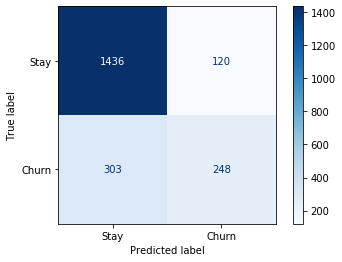

In [26]:
disp = plot_confusion_matrix(svc, X_test_std, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

<Figure size 864x576 with 0 Axes>

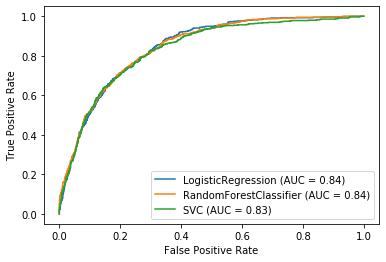

In [29]:
plt.figure(figsize=(12, 8))
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)

# 4. XGBoost Classifier

In [30]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.11%
_______________________________________________
Classification Report:	Precision Score: 70.79%
			Recall Score: 55.67%
			F1 score: 62.32%
_______________________________________________
Confusion Matrix: 
 [[3308  300]
 [ 579  727]]

Test Result:
Accuracy Score: 79.78%
_______________________________________________
Classification Report:	Precision Score: 64.78%
			Recall Score: 49.73%
			F1 score: 56.26%
_______________________________________________
Confusion Matrix: 
 [[1407  149]
 [ 277  274]]



In [44]:
hyperparameter_grid = {'n_estimators': [50, 75, 90], 
#                        'max_depth': [2, 3, 5, 10, 15],
                       'learning_rate' : [0.09, 0.1, 0.2], 
#                        'min_child_weight' : [1, 2, 3, 4], 
                       'base_score' : [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                      }

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(estimator=xgb_clf, param_grid=hyperparameter_grid, cv=3, 
                      scoring='f1', n_jobs =-1, verbose=1)

xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   43.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_score': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
                         'learning_rate': [0.09, 0.1, 0.2],
                         'n_estimators': [50, 

In [45]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.15, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
xgb_clf = XGBClassifier(base_score=0.15, 
                    learning_rate=0.1, 
#                     max_depth=2,
#                     min_child_weight=3, 
                    n_estimators=90)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.64%
_______________________________________________
Classification Report:	Precision Score: 71.59%
			Recall Score: 57.50%
			F1 score: 63.78%
_______________________________________________
Confusion Matrix: 
 [[3310  298]
 [ 555  751]]

Test Result:
Accuracy Score: 80.30%
_______________________________________________
Classification Report:	Precision Score: 65.60%
			Recall Score: 51.91%
			F1 score: 57.95%
_______________________________________________
Confusion Matrix: 
 [[1406  150]
 [ 265  286]]



## XGBoost cross validations score

In [49]:
scores = cross_val_score(xgb_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.58974359 0.58802502 0.5748393 ]
XGBoost F1_score: 58.42% +/- (0.67)
